# 逻辑回归-线性可分
案例：根据学生的两门学习成绩，预测该学生是否会被录取
数据集：ex2data1.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

## 1.数据可视化
分为被录取和未录取

In [2]:
path = "ex2data1.txt"
data = pd.read_csv(path,names=['Exam 1','Exam 2','Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


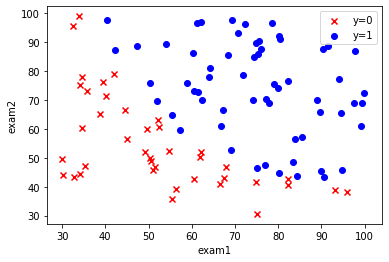

In [3]:
frg,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

## 2.构造代价函数

In [4]:
#构造X，y矩阵，封装成一个函数方便调用
def get_Xy(data):
    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values
    
    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)
    
    return X,y

In [5]:
X,y = get_Xy(data)

In [6]:
X.shape#检查维度

(100, 3)

In [7]:
y.shape

(100, 1)

#### 代价函数中用到sigmoid函数：$ h_\theta( x ) =\frac{1}{1+{e^{-\theta^T x}}}$

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def costfunction(X,y,theta):
    u = sigmoid(X@theta)
    first = y * np.log(u)
    second = (1-y) * np.log(1-u)
    return -(np.sum(first + second))/len(X)

In [10]:
#初始化θ
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [11]:
cost_init = costfunction(X,y,theta)
print(cost_init)

0.6931471805599453


## 3.梯度下降

#### 梯度公式：$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$

In [12]:
def gradientDescent(X,y,theta,iters,alpha):
    m = len(X)
    costs = []
    
    for i in range(iters):
        A = sigmoid(X@theta)#先把含有sigmoid函数的项算出来
        theta  = theta -(alpha/m)  * X.T @ (A - y)
        cost = costfunction(X,y,theta)
        costs.append(cost)
        if i % 10000 == 0:
            print(cost)
    return costs, theta

In [13]:
alpha = 0.004
iters = 200000

In [14]:
costs,theta_final = gradientDescent(X,y,theta,iters,alpha)

1.9886538578930084
2.7066763807478127
5.159653459570274
1.3288041261254437
1.6525865746034032
0.334478044895226
0.8401579263488419
0.9593734096464135
0.3227041012186722
0.46007956427143226
0.5862147537785243
0.5563008562186095
0.5181653708713927
0.47602965884191434
0.43309711107262444
0.39138015073568366
0.3524418831806119
0.31772301939998754
0.2883949718298337
0.26496140669529517


In [15]:
theta_final

array([[-23.77445621],
       [  0.20684474],
       [  0.19996049]])

In [16]:
theta_final.shape

(3, 1)

## 4.画出决策边界

In [17]:
#决策直线的参数:
coef1 = - theta_final[0,0]/theta_final[2,0]
coef2 = - theta_final[1,0]/theta_final[2,0]

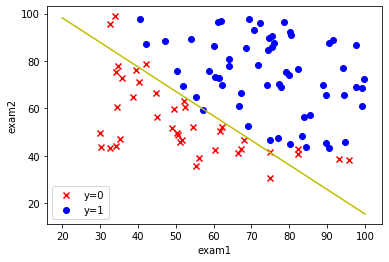

In [18]:
x = np.linspace(20,100,100)
f = coef1 + coef2*x

frg,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
ax.plot(x,f,c='y')
plt.show()

## 5.评价逻辑回归模型

In [19]:
#计算准确率
def predict(X,theta):
    prob = sigmoid(X@theta) 
    return [1 if x>=0.5 else 0 for x in prob]
y_ = np.array(predict(X,theta_final)) 
y_pre = y_.reshape(len(y_),1)
acc = np.mean(y_pre == y)#相同返回1，不同返回0
print('{0}%'.format(acc*100))

91.0%


In [20]:
#实现h（θ）
def hfunc(theta,x):
    return sigmoid(np.dot(theta.T,x))
hfunc(theta_final,[1,45,85])

array([0.92623192])